In [1]:
original_ts = "interval1/200702111400/108500/108568-187_168_11_99.csv"
stl_ts_trend = "interval1_reconstructed_STL_trend/200702111400/108500/108568-187_168_11_99.csv"
stl_ts_seasonal = "interval1_reconstructed_STL_seasonal/200702111400/108500/108568-187_168_11_99.csv"
stl_ts_combined = "interval1_reconstructed_STL_combined/200702111400/108500/108568-187_168_11_99.csv"
stl_ts_detrend = "interval1_reconstructed_STL_detrend/200702111400/108500/108568-187_168_11_99.csv"
# dual_stl_ts = "interval1_reconstructed_dual_STL_trend/200702111400/108500/108568-187_168_11_99.csv"
# trial_stl_ts = "interval1_reconstructed_trial_STL_trend/200702111400/108500/108568-187_168_11_99.csv"
# ssa_ts = "reconstructed_SSA/200702111400/108500/108568-187_168_11_99.csv"

In [2]:
import pandas as pd

original_ts_df = pd.read_csv(original_ts)
stl_ts_trend_df = pd.read_csv(stl_ts_trend)
stl_ts_seasonal_df = pd.read_csv(stl_ts_seasonal)
stl_ts_combined_df = pd.read_csv(stl_ts_combined)
stl_ts_detrend_df = pd.read_csv(stl_ts_detrend)
# stl_ts_df = pd.read_csv(stl_ts)
# dual_stl_ts_df = pd.read_csv(dual_stl_ts)
# trial_stl_ts_df = pd.read_csv(trial_stl_ts)
# ssa_ts_df = pd.read_csv(ssa_ts)

In [ ]:
import matplotlib.pyplot as plt

features = ['packets', 'bytes', 'flows', 'packets/flows', 'bytes/flows', 'bytes/packets', 'flows/(bytes/packets)', 'nodes']

for feature in features:
    plt.figure(feature).suptitle(feature)
    original_ts_df[feature][3:-3].plot(legend=True, label="Original")
    # stl_ts_trend_df[feature][3:-3].plot(legend=True, label="STL Trend")
    # stl_ts_combined_df[feature][3:-3].plot(legend=True, label="STL Combined")
    stl_ts_detrend_df[feature][3:-3].plot(legend=True, label="STL Detrend")

In [23]:
from glob import glob
from IPython.display import clear_output
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

import os
import random
import time

14200-172_36_215_133.csv


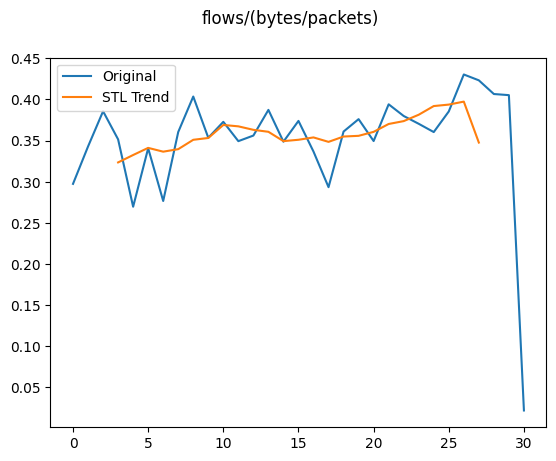

KeyboardInterrupt: Interrupted by user

In [29]:
INTERVAL = 30

original_ts_prefix = f"interval{INTERVAL}"
stl_ts_trend_prefix = f"interval{INTERVAL}_reconstructed_STL_trend"
stl_ts_seasonal_prefix = f"interval{INTERVAL}_reconstructed_STL_seasonal"
stl_ts_combined_prefix = f"interval{INTERVAL}_reconstructed_STL_combined"
stl_ts_detrend_prefix = f"interval{INTERVAL}_reconstructed_STL_detrend"

features = ['flows/(bytes/packets)']

for dirname in glob(Path(f'{original_ts_prefix}/200702111400/*').__str__()):
    clear_output(wait=True)
    
    random.seed(time.time())
    filename = random.choice(glob(f'{dirname}/*'))
    print(os.path.basename(filename))
    
    original_ts = filename
    stl_ts_trend = filename.replace(original_ts_prefix, stl_ts_trend_prefix)
    stl_ts_seasonal = filename.replace(original_ts_prefix, stl_ts_seasonal_prefix)
    stl_ts_combined = filename.replace(original_ts_prefix, stl_ts_combined_prefix)
    stl_ts_detrend = filename.replace(original_ts_prefix, stl_ts_detrend_prefix)
    
    original_ts_df = pd.read_csv(original_ts)
    stl_ts_trend_df = pd.read_csv(stl_ts_trend)
    stl_ts_seasonal_df = pd.read_csv(stl_ts_seasonal)
    stl_ts_combined_df = pd.read_csv(stl_ts_combined)
    stl_ts_detrend_df = pd.read_csv(stl_ts_detrend)
    
    for feature in features:
        plt.figure(feature).suptitle(feature)
        original_ts_df[feature].plot(legend=True, label="Original")
        stl_ts_trend_df[feature].plot(legend=True, label="STL Trend")
        # stl_ts_seasonal_df[feature].plot(legend=True, label="STL Seasonal")
        # stl_ts_combined_df[feature].plot(legend=True, label="STL Combined")
        # stl_ts_detrend_df[feature].plot(legend=True, label="STL Detrend")
    
    plt.show()
    input()